In [12]:
%%javascript  # Allow equation numbers
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});


<IPython.core.display.Javascript object>

In [13]:
# General imports needed for this project:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
from astropy.visualization import quantity_support
quantity_support()
set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)

(It would be nice if you could provide a short introduction to the code, and why you are writing it here.)

# Exercise 1: The Planck Law and radiation through an isothermal layer


<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Plot the Planck function $B_\lambda$ for 100 $< \lambda <$ 2000 nm for a range of temperatures (5000 to 8000 K). Use a log scale for both the x and y axes. Explain the slopes of the righthand part.

Answer:
    
</div>    

The Planck function specifies the radiation intensity emitted by a gas or a body in thermodynamic equilibrium as
 
\begin{equation} 
   B_\lambda(T) = \frac{2hc^2}{\lambda^5} 
                  \frac{1}{\mathrm{e}^{hc/\lambda kT}-1}
  \label{eq:1.1}
\end{equation}

We want to plot \eqref{eq:1.1} for 100 < $\lambda$ < 2000 nm for a range of temperatures (5000 to 8000 K), in order to observe how the intensities corresponding to these different given temperatures develop at different wavelengths. This can be done by using a BlackBody model from astropy and importing a variation of imports from astropy, making it easier when converting between units.

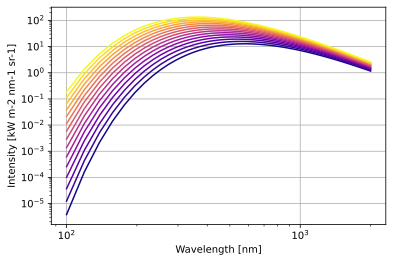

In [14]:
from astropy import units
from astropy import constants
from astropy.visualization import quantity_support
from astropy.modeling.models import BlackBody
from matplotlib import cm
from cycler import cycler

temp = units.Quantity([5000,8000], unit='K')
bb = BlackBody(temp)

# Gives Plack function as a func of lambda(wavelength):
i_units = 'W m-2 nm-1 sr-1'
bb_lambda = BlackBody(temp, scale=1. * units.Unit(i_units))

wave = numpy.linspace(100,2000,100) * units.nm
temp = numpy.linspace(5000,8000,15) * units.K
bb_lambda(wave[:, numpy.newaxis])

radiation = BlackBody(temp, scale=1.*units.Unit(i_units))(wave[:,numpy.newaxis])

fig, ax = plt.subplots()
custom_cycler = cycler('color', cm.plasma(numpy.linspace(0,1,len(temp))))
ax.set_prop_cycle(custom_cycler)
ax.plot(wave, radiation.to('kW m-2 nm-1 sr-1'))
plt.ylabel("Intensity [kW m-2 nm-1 sr-1]")
plt.xlabel("Wavelength [nm]") #$\\lambda$
plt.xscale("log")
plt.yscale("log")
plt.grid()

In the plot presented above, we see the Plack function, $B_{\lambda}$ for 100 < $\lambda$ < 2000 nm, as a function of wavelength $\lambda$ (5000 to 8000 K). We observe that the slopes for the different intensities corresponding to 15 different tempertures will approach eachother on the right hand part. The reason for this is that Planck's law at long wavelengths becomes the Rayleigh-Jeans law [kilde ????, https://en.wikipedia.org/wiki/Planck%27s_law#Approximations],

\begin{equation*}
B_{\lambda}(T) \approx \frac{2 c}{\lambda^4} k_B T, \\
\end{equation*}


which means that,

\begin{equation*}
B_{\lambda} \ \propto \ \frac{1}{\lambda^4}. \\
\end{equation*}


And since we have a log plot, looking at log(1/$\lambda^4$), we can obatin

\begin{equation*}
\text{log} \Big( \frac{1}{\lambda^4} \Big) = \text{log}(1) - \text{log}(\lambda^4) = -4 \text{log}(\lambda),\\
\end{equation*}


which indicates that the intensitites decreases linearly like -4$\lambda$ in this plot.


<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Use equation (5) to calculate the radiation through an isothermal layer. Make plots of $I_\lambda$ for the different values of $I_\lambda(0)$, using the following values:

``` python
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = numpy.arange(5)
```

* How does $I_\lambda$ depend on $\tau$ for $\tau \ll 1$ when $I_\lambda(0) =0$ (hint: use a log scale in the x and y axes to study the behavior at small $\tau$)?  And when $I_\lambda(0) > B_\lambda$? Such a layer with $\tau \ll 1$ is called "optically thin", why? Would "radiatively thin" be a better name?
    
* A layer is called "optically thick" when it has $\tau \gg 1$. Why? The emergent intensity becomes independent of $\tau$ for large $\tau$. Can you explain why this is so in physical terms?
 

 
Answer:
    
</div>  

Next, we want to calculate the radiation through an isothermal layer, by use of the equation


\begin{equation}
   I_\lambda = I_\lambda(0) \mathrm{e}^{-\tau} 
        + B_\lambda \, \left( 1 - \mathrm{e}^{-\tau} \right).
    \label{eq:1.2}
\end{equation}

This we want to do in order to create plots of $I_{\lambda}$ for the different values of $I_\lambda(0)$, so that we can investigate how the intensities evolves when the optical path increases. 

When performing the calculations, we will be using some chosen values presented below,

``` python
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = numpy.arange(5)
```


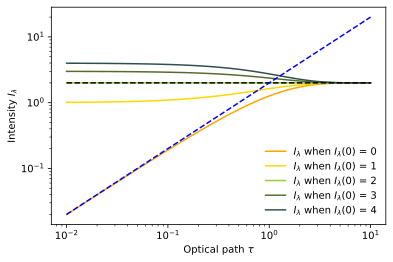

In [15]:
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = np.arange(5)

def I_lambda(tau,b_lambda,I0):
    return_I = (I0 * numpy.exp(-tau)) + b_lambda*(1-numpy.exp(-tau))
    return return_I
 
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[0]), "orange", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 0")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[1]), "gold", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 1")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[2]), "yellowgreen", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 2")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[3]), "darkolivegreen", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 3")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[4]), "darkslategrey", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 4")
plt.ylabel("Intensity $I_{\\lambda}$")
plt.xlabel("Optical path $\\tau$")
plt.plot(tau, numpy.ones(100)*b_lambda, "k--")
plt.plot(tau, tau*b_lambda, "b--")
plt.legend()
plt.loglog()
plt.show()


The plot above presents the intensity as a function of optical path. 
When the optical path is small, the intensity corresponding to when $I(0)=0$ goes as $B_{\lambda} \tau$, which is represented by the blue dashed line. When looking at Eq \eqref{eq:1.2} for $\tau \ll 1$ when $I(0)=0$ we get, 

\begin{equation}
I_{\lambda} = B_{\lambda}(1-e^{- \tau}),
\end{equation}

and then we Taylor expand $e^{- \tau}$ at $\tau = 0$ and get

\begin{equation}
(1-e^{- \tau}) \approx e^0 - e^{- \tau} \tau = e^0 - \tau = 1 - \tau.
\end{equation}

When inserting this back into the original expression, we obtain

\begin{equation}
I_{\lambda} = B_{\lambda}(1 - (1 - \tau)) = B_{\lambda} \tau.
\end{equation}


When $I(0)=2$ the intensity is constant at 2, and we can see the reason why by again looking at Eq \eqref{eq:1.2}, and observing that the expression becomes

\begin{equation}
I_{\lambda} = 2 e^{-\tau} + 2(1-e^{- \tau}) = 2,
\end{equation}

when inserting $I(0)=2$ and $B_{\lambda} = 2$. 

Next, we look at when $I_\lambda(0) > B_\lambda$ and oberve from the plot that for $\tau \ll 1$ the intensity will be greater than when $I_\lambda(0) \leq B_\lambda$. The top two dark green lines represents this situation.

A layer when $\tau \ll 1$ is called "optically thin", becuase the medium becomes very transparent. A photon can pass trough this medium witout absorbtion, and an example of such an optically thin medium can be glas or water as opposed to a wooden table, which is a layer called "optically thick". This is when $\tau \gg 1$, and photons can no longer travel trough without absorption. 

In the plot, we observe that after $\tau \approx 10^{-1}$ all the intensities approach eachother at $I_{\lambda} = 2$. The reason for this can also be found by looking at Eq \eqref{eq:1.2}. We see that the exponentials goes to zero when $\tau \gg 1$, and the expression becomes 

\begin{equation}
I_{\lambda} = B_{\lambda} = 2.
\end{equation}

If we look at this in physical terms, it means that when $\tau$ becomes very large, the intensity becomes independent of $\tau$, and the medium becomes so opaque that all the light that is emmited, on the other side of the medium relative to the light source, is the light emmtied from the object itself.


# Exercise 2: Spectral lines from a solar reversing layer

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Compute and plot the emergent line profiles using a Schuster-Schwarzschild model, writing code for this purpose. Try changing the parameters (`temp_surface`, `temp_layer`, `a`, `tau0`) to see if you can obtain a saturated line profile (flat bottom). Which parameter(s) are more important in determining this?

Answer: Code below



</div>

The Schuster-Schwarzschild model, also known as the reversing-layer model, is a model that describes radiation which originate at an isothermal layer around the stellar surface. The wavelength lines is caused by atom in a bound-bound transition and the layer may be optically thin or thick based on the concentration of the atoms. The atoms that causes these types of lines have a temperature $T_{\textrm{layer}}$ and therefore contributes to the total emergent intesity. The equation of interest goes as following:

\begin{equation} 
  I_\lambda = B_\lambda(T_{\rm surface}) \mathrm{e}^{-\tau_\lambda} 
        + B_\lambda(T_{\rm layer}) \, \left( 1 - \mathrm{e}^{-\tau_\lambda} \right).
    \label{eq:SS_transfer}
\end{equation}
where $B_{\lambda}$ is the Planck function contributed to the intensity in TE either on the surface or at the layer and $\tau_{\lambda}$ is the optical depth. But $\tau$ is dependent on the wavelength, so we need to compute this first by using the Voigt function. The Void function includes the broadening of wavelength due to for example Doppler shift or interaction between particles due to electric fields. An arbitrary value of the wavelength is chosen to be $\lambda = 300$ nm. We then develope the following code by allowing us to introduce radiation from a black body from the library package $\verb|astropy|$:

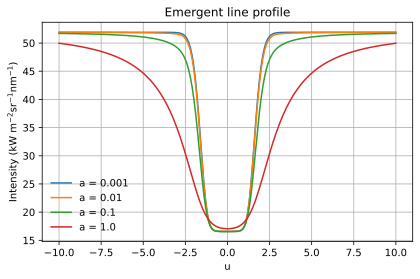

In [16]:
from astropy.modeling.blackbody import blackbody_lambda
from astropy.modeling.blackbody import blackbody_nu
from scipy.special import wofz
i_units = "kW m-2 sr-1 nm-1"      # practical SI units


def voigt(damping, u):
    """
    Calculates the Voigt function.
    """
    z = (u + 1j * damping)
    return wofz(z).real


def compute_profile(tau0, a, u, wavelength):
    wave = wavelength[np.newaxis, np.newaxis]
    tau = tau0[np.newaxis] * voigt(a, u[:, np.newaxis])
    tau = tau[..., np.newaxis]
    
    result = (blackbody_lambda(wave, temp_surface) * np.exp(-tau)) + \
            blackbody_lambda(wave, temp_layer) * (1-np.exp(-tau))
    
    return np.squeeze(result)



wave = units.Quantity(300, unit = "nm")
#tau0 = np.array([0.1])
tau0 = np.array([10])
a = np.logspace(-3, 0, 4)
u = np.linspace(-10, 10, 201)
#temp_surface = 4200 * units.K
#temp_layer = 6000 * units.K
temp_surface = 7000 * units.K
temp_layer = 6000 * units.K

intensity = compute_profile(tau0, a, u, wave)

plt.figure()
plt.plot(u, intensity.to(i_units))
plt.title("Emergent line profile")
plt.xlabel("u")
plt.ylabel("Intensity (kW $\mathrm{m^{-2} sr^{-1} nm^{-1}}$)")
plt.grid()
legend_elements = ['a = %s' % value for value in a]
plt.legend(legend_elements)
plt.tight_layout()




After some trial and error by changing the parameters $T_{\rm surface}, T_{\rm layer}, a$ and $\tau_0$, we get a saturated line profile if the layer temperature is lower than the surface temperature.

------------

After some trial and error by changing the parameters $T_{\rm surface}, T_{\rm layer}, a$ and $\tau_0$, it is concluded that $a$ is the parameter that affects the saturation the most. We observe from the plot that if $a$ is high enough, the curve seems to flatten out at $I(0)$. $a$ is a measure due to the Coulomb disturbance in radiation. Changing $\tau(0)$ does also contributes to decrease the amplitude of the intensity. However, it does not change the shape of the curve as the parameter $a$ does.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Make a plot of line profiles with different $\tau_0$, using `tau0 = 10 ** numpy.linspace(-2, 2, 9)`. How do you explain the profile shapes for $\tau(0) \ll 1$? Why is there a low-intensity saturation limit for $\tau \gg 1$? Why do the line wings develop only for very large $\tau(0)$? Where do the wings end? For which values of $\tau(0)$ is the layer optically thin, respectively optically thick, at line center? And at $u=5$?

Answer:

</div>

Now we define the Coulumb disturbance parameter to an arbitrary value $a=0.1$ and then plot for increasing value of the optical length $\tau_0 \in [10^{-2}, 10^{2}]$.

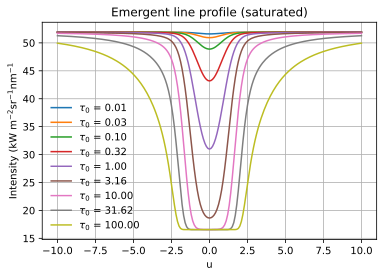

In [17]:
a = 0.1
f = 0 #2.4
tau0 = np.logspace(-2+f,2+f,9)

for t0 in tau0:
    intensity = compute_profile(t0, a, u, wave)
    plt.plot(u, intensity.to(i_units), label=r"$\tau_0$ = %.2f" % t0)
plt.title("Emergent line profile (saturated)")
plt.xlabel("u")
plt.ylabel("Intensity (kW $\mathrm{m^{-2} sr^{-1} nm^{-1}}$")
plt.legend()
plt.grid()

From the plot above, we notice that when the optical depth is low ($\tau(0) \ll 1$) the profiles seems to be very little affected which means that the radiation from that wavelength is almost not absorbed or scattered at all. This is not the case when $\tau(0)$ increases as we observe. The intensity decreases for that specific wavelength as the optical depth is greater. This makes sense as the photon with this wavelength needs to travel through a higher concentration of atoms. We also notice that the intensity converges to a certain value when $\tau(0) \gg 1$. If we look at equation (1  $\ref{eq:SS_transfer}$), we see the right-hand side is totally determined by $B_{\lambda}(T_{\rm surface})$ as $B_\lambda(T_{\rm layer}) \, \left( 1 - \mathrm{e}^{-\tau_\lambda} \right) \to 0$. The intensity contribution from the layer is neglictable if the optical length is much greater than one.

The plot shows how the line wings develops for only large values of $\tau(0)$. This is a result due to the Voigt function. As mentioned earlier, the Void function describes the broadening of a line as caused by atomic thermal motion or electric field interactions. It is a convolution between both a Gaussian distribution and a Lorentzian distribution. The Gaussian distribution dominates close to the line center (small or no Doppler shift) while else the Lorentzian distribution dominates. Since the optical depth is so large, the radiation originated in the layer will interact several times with its surroundings before it reaches the observer. In theory, the wings will never end as the radiation may in principle interact with other particles for ever. This is though highly unlikely.

The layer is optically thin if the intensity is transparent to radiation. The layer is optically thick if the intensity is fully depleted. From the plot with the chosen wavelength of $\lambda = 300$ nm, it may seem that the layer is is optically thin for $\tau(0) < 0.01$ and optically thick at $\tau(0) \approx 3.2$ at the line center. For $u=5$ and after some testing in the value of $\tau(0)$ it seems that the layer is optically thin at $\tau(0) \approx 20$ and optically thick at $\tau(0) \approx 25 \cdot 10^3$.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Now study the dependence of these line profiles on wavelength by repeating the above for $\lambda=$ 200 nm (ultraviolet) and $\lambda=$ 1000 nm (near infrared). What sets the top value $I_{\rm cont}$ and the limit value reached at line center by $I(0)$? Check these values by computing them directly. What happens to these values at other wavelengths?  

Answer:
    
</div>

We will now repeat the same procedure as above but with other values of $\lambda$. The first case will consist of $\lambda = 300$ and then for $\lambda = 1000$ as it will be in the ultraviolet and infrared domain respectively. The parameters is set to $a=0.1$ and and $\tau(0) = 1$.

Limit value at I(0) for UV:    0.867991633053434 kW / (m2 nm sr)
Limit value at I(0) for IR:   6.945293840613092 kW / (m2 nm sr)


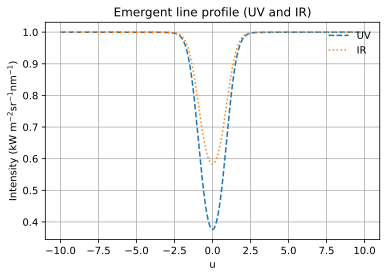

In [18]:
wave_uv = units.Quantity(200, unit = "nm")       # ultraviolet
wave_ir = units.Quantity(1000, unit = "nm")      # infrared

tau0 = np.array([1])
#a = np.logspace(-3, 0, 4)
a = np.array([0.01])
u = np.linspace(-10, 10, 201)
temp_surface = 6000 * units.K
temp_layer = 4200 * units.K

intensity_uv = compute_profile(tau0, a, u, wave_uv).to(i_units)
intensity_ir = compute_profile(tau0, a, u, wave_ir).to(i_units)

intensity_uv_0 = compute_profile(tau0, a, np.array([0]), wave_uv)
intensity_ir_0 = compute_profile(tau0, a, np.array([0]), wave_ir)

print("Limit value at I(0) for UV:   ", intensity_uv_0.to(i_units))
print("Limit value at I(0) for IR:  ", intensity_ir_0.to(i_units))

intensity_uv /= intensity_uv[0]
intensity_ir /= intensity_ir[0]

plt.figure()
plt.plot(u, intensity_uv, "--", label="UV")
plt.plot(u, intensity_ir, ":", label="IR", ms=3)
plt.title("Emergent line profile (UV and IR)")
plt.xlabel("u")
plt.ylabel("Intensity (kW $\mathrm{m^{-2} sr^{-1} nm^{-1}}$)")
plt.grid()
#legend_elements = ['a = %s' % value for value in np.append(a,a)]
#plt.legend(legend_elements);
plt.legend(loc=1);


We notice how the profiles differs for various wavelengths. The top curves represents the profiles in infrared region while the bottom curves represents the profiles in the ultraviolet region.

Comparing a range of wavelength from 200 nm to 1000 nm:

Limit value at I(0) for lambda = 200 nm:   2.3080545920167013 kW / (m2 nm sr)
Limit value at I(0) for lambda = 333 nm:   21.736318794123683 kW / (m2 nm sr)
Limit value at I(0) for lambda = 466 nm:   31.728482414995156 kW / (m2 nm sr)
Limit value at I(0) for lambda = 600 nm:   28.65308402948787 kW / (m2 nm sr)


Limit value at I(0) for lambda = 733 nm:   22.17186322726979 kW / (m2 nm sr)
Limit value at I(0) for lambda = 866 nm:   16.327412513999256 kW / (m2 nm sr)
Limit value at I(0) for lambda = 1000 nm:   11.901749752273696 kW / (m2 nm sr)


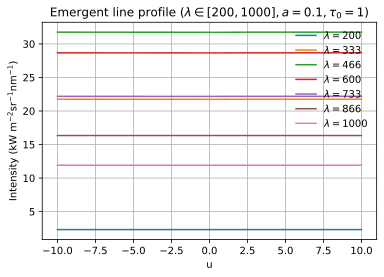

In [19]:
wave = np.linspace(200, 1000, 7) * units.nm
tau0 = np.array([0.001])
a = np.array([0.01])

plt.figure()
for w in wave:
    intensity = compute_profile(tau0, a, u, w)
    intensity_0 = compute_profile(tau0, a, np.array([0]), w)
    print("Limit value at I(0) for lambda = %i nm:  " % w.value, intensity_0.to(i_units))
    plt.plot(u, intensity.to(i_units), label=r"$\lambda = %i$" % w.value)
plt.title(r"Emergent line profile ($\lambda \in [200,1000], a=0.1, \tau_0=1$)")
plt.xlabel("u")
plt.ylabel("Intensity (kW $\mathrm{m^{-2} sr^{-1} nm^{-1}}$)")
plt.grid()
#legend_elements = ['a = %s' % value for value in np.append(a,a)]
#plt.legend(legend_elements);
plt.legend(loc=1);


The plot above shows how the intensities varies for various wavelength. Notice that the curve which corresponds to $\lambda = 466$ nm has the greatest peak for

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Make a figure with plots for the above: line profiles for several values of $\tau_0$, and the three different wavelengths (200, 500, and 1000 nm). However, normalise each line profile by its continuum intensity: `intensity /= intensity[0]` (observed spectra are usually normalised this way because absolute calibrations are often missing). Explain the wavelength dependencies in this plot.

Answer:

</div>

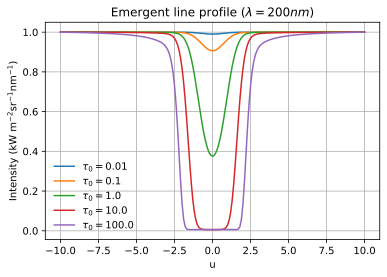

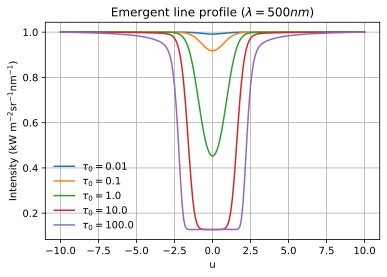

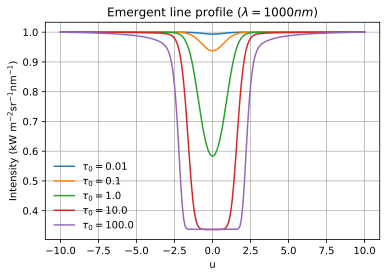

In [20]:
tau0 = np.logspace(-2,2,5)
wave = np.array([200, 500, 1000]) * units.nm


for i in range(len(wave)):
    plt.figure(i)
    plt.title(r"Emergent line profile ($\lambda=%inm$)" % wave.value[i])
    plt.grid()
    plt.xlabel("u")
    plt.ylabel("Intensity (kW $\mathrm{m^{-2} sr^{-1} nm^{-1}}$)")
    
    for j in range(len(tau0)):
        intensity = compute_profile(tau0[j], a, u, wave[i])
        plt.plot(u, intensity/np.max(intensity), label=r"$\tau_0=%s$" % tau0[j])
    plt.legend()


These three plots show the results of the reversing model by different values of $\lamba$. The first thing to notice is how the profile varies a lot for the optical depth $\tau(0) = 0.01$. We observe that the profile is greatly changing relative to the continuum intensity in the UV region. This is different for the IR region as it is almost constant. 

# Exercise 3: The curve of growth

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Using the code from Exercise 2, compute and plot a curve of growth by plotting $W_\lambda$ against $\tau_0$ on a log-log plot. Explain what happens in the three different parts.
    

* The first part has slope 1:1, the third part has slope 1:2 in this log-log plot.  Why?

Answer:


</div>

The strengt of a spectral line is expressed as the equivalent width. We want to plot a curve of growth by plotting the equivalent width $W_{\lambda}$ against $\tau_0$ on a log-log plot. This we want to do so that we can investigate what happens with the width as $\tau_0$ increases. This is done by defining $W_{\lambda}$,

\begin{equation}
W_{\lambda} \equiv \int 1 - \frac{I(\lambda)}{I_{\text{cont}}} d \lambda,
\end{equation}

using the compute_profile function defined in exercise 2 and a blackbody function importet from astropy to calculate the $I(\lambda)$ and $I_{\text{cont}}$ respectively, and using the numpy.trapz function to solve the integral.

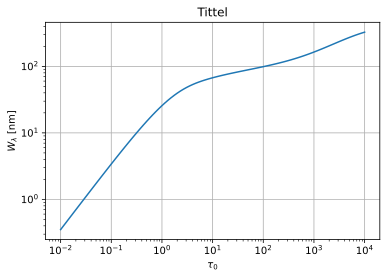

In [21]:
tau0 = 10** np.linspace(-2,4,100)
wavelength = np.array([200])*units.nm  #bølgelengden til spektrallinjna vi ønsker
wave = np.linspace(100,500,len(u))*units.nm

intensity_new = compute_profile(tau0, a, u, wavelength).to(i_units)
intensity_cont = blackbody_lambda(wavelength, temp_surface).to(i_units)

integrate = 1 - (intensity_new/intensity_cont)


W_lambda = np.trapz(integrate,wave,axis=0)

plt.figure()
plt.loglog(tau0, W_lambda,"-");
plt.title("Tittel")
plt.grid()
plt.xlabel("$\\tau_0$")
plt.ylabel("$W_{\\lambda}$ [nm]");


In the plot presented above, we observe three different parts. The first par, where $\tau_0 < 1$, has a slope 1:1. In this area, the optical depth ???

Explain what happens in the three different parts.
The first part has slope 1:1, the third part has slope 1:2 in this log-log plot. Why?

(hva indikerer det egegntlig at den øker som den gjør? det må vi svare på under plottet). 

HER MÅ VI FORKLARE. ????????

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">


* Which parameter controls the location of the onset of the third part? Give a rough estimate of its value for solar iron lines through comparison with the given figure from Wright (1948).

Answer:
    
</div>

??????

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">


* Which parameter should you increase to produce emission lines instead of absorption lines? Change it accordingly and modify the code to produce emission profiles and an emission-line curve of growth. (To avoid taking the log of negative $W_\lambda$, plot the absolute value of $W_\lambda$.)

Answer:
    
</div>

Up until this point, we have proced absorbsion profiles. If we instead want to produce emission lines, the values of the layer (?) and surface temperature(?) needs to be changed. This is because...????? 

We can test this by changing the code and observe the resulting plot. bla bla mer..

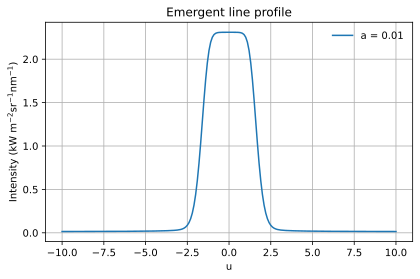

In [22]:
#for å produce emission lines instead of absorption lines, så skriver vi heller
#temp_surface = 4200 * units.K
#temp_layer = 6000 * units.K
#avhengig av hvilke av de som er størst. Hvis 



tau0 = np.array([10])
wave = np.array([200])*units.nm

temp_surface = 4200 * units.K
temp_layer = 6000 * units.K
#layer må være større enn surface! da får vi absorbsjonslinje istedenfor

intensity = compute_profile(tau0, a, u, wave)

plt.figure()
plt.plot(u, intensity.to(i_units))
plt.title("Emergent line profile")
plt.xlabel("u")
plt.ylabel("Intensity (kW $\mathrm{m^{-2} sr^{-1} nm^{-1}}$)")
plt.grid()
legend_elements = ['a = %s' % value for value in a]
plt.legend(legend_elements)
plt.tight_layout()


We notice, in the plot presented above, that switching the values of the layer and surface temperature results in an absorbtion line. The outcome of the spectral line depends on which of these two temperature values are greatest. When the layer temperature is greater than the surface temeprature, we get an absorbtion line. The reason for this is ...WHY?????? se på en likning eller no?

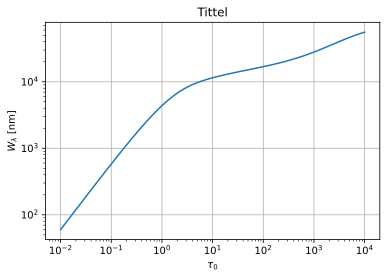

In [23]:
tau0 = 10** np.linspace(-2,4,100)
#wavelength = np.array([200])*units.nm
wave = np.linspace(100,500,201)*units.nm

intensity_new2 = compute_profile(tau0, a, u, wavelength).to(i_units)
intensity_cont = blackbody_lambda(wavelength, temp_surface).to(i_units)

integrate = 1 - (intensity_new2/intensity_cont)


W_lambda = np.abs(np.trapz(integrate,wave,axis=0))

plt.figure()
plt.loglog(tau0, W_lambda,"-");
plt.title("Tittel")
plt.grid()
plt.xlabel("$\\tau_0$")
plt.ylabel("$W_{\\lambda}$ [nm]");